In [1]:
%cd ..

/volatile/home/Zaccharie/workspace/understanding-unets


In [2]:
%matplotlib nbagg
import glob
import math

import matplotlib.pyplot as plt
import numpy as np

In [3]:
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['image.cmap'] = 'gray'

In [12]:
div_2k_dir_train = 'DIV2K_train_HR/none_class'
div_2k_dir_valid = 'DIV2K_valid_HR/none_class'
bsd_dir_train = 'BSDS300/images/train'
bsd_dir_test = 'BSDS300/images/test'

In [13]:
selected_dir = div_2k_dir_train

In [14]:
filelist = glob.glob(selected_dir + '/*')

In [15]:
len(filelist)

800

In [16]:
filelist[0]

'DIV2K_train_HR/none_class/0417.png'

In [17]:
im_list = [plt.imread(fname).mean(axis=-1) for fname in filelist[740:]]

In [18]:
im_list[0]

array([[0.5045752 , 0.50849676, 0.50849676, ..., 0.2627451 , 0.27058825,
        0.28235295],
       [0.5045752 , 0.50849676, 0.50849676, ..., 0.26666668, 0.26666668,
        0.27058825],
       [0.5045752 , 0.5045752 , 0.5045752 , ..., 0.26666668, 0.25882354,
        0.27058825],
       ...,
       [0.5045752 , 0.4888889 , 0.5124183 , ..., 0.606536  , 0.6183007 ,
        0.6143791 ],
       [0.5045752 , 0.5006536 , 0.4888889 , ..., 0.61960787, 0.61960787,
        0.6117647 ],
       [0.503268  , 0.5045752 , 0.5019608 , ..., 0.62222224, 0.61960787,
        0.61568624]], dtype=float32)

<IPython.core.display.Javascript object>


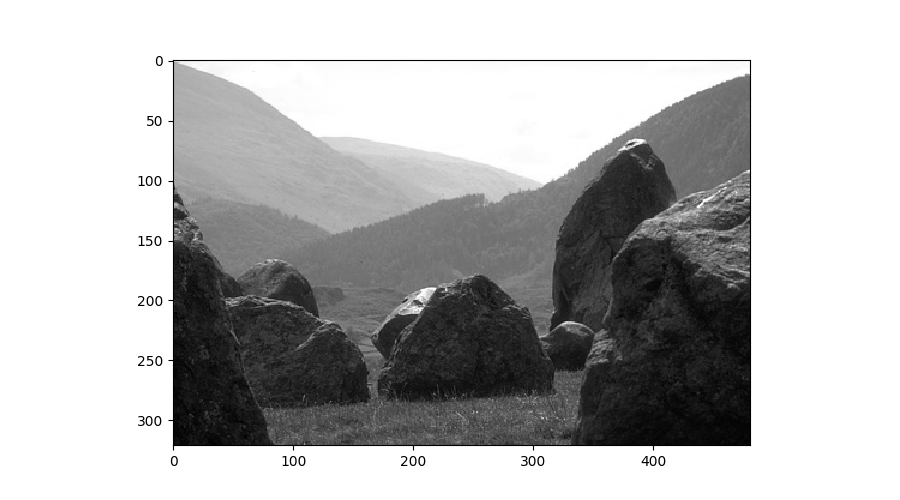

In [11]:
plt.figure()
plt.imshow(im_list[0])

In [13]:
def do_thing(x):
    if x.shape == (256, 256):
        return x
    else:
        print(x.shape)
        raise ValueError

In [14]:
x = im_list[0]

<IPython.core.display.Javascript object>


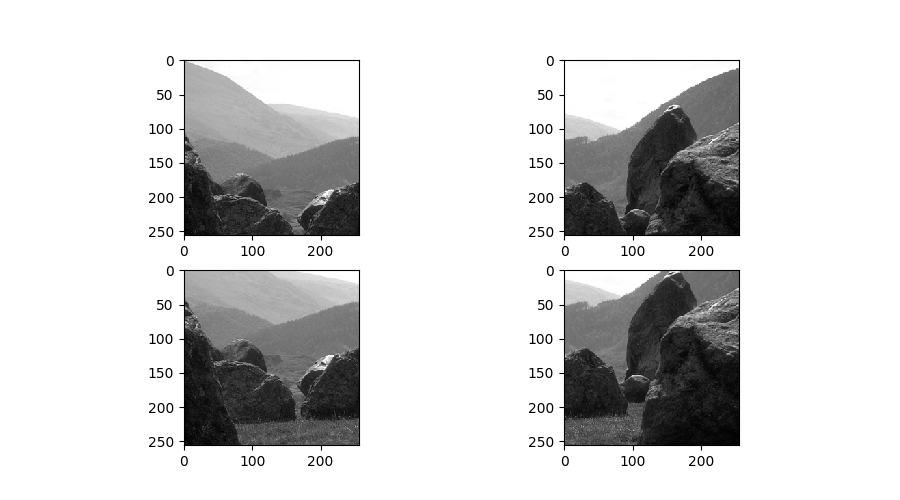

0 0 (256, 256)
0 1 (256, 256)
1 0 (256, 256)
1 1 (256, 256)


In [22]:
sub_patches = {}
recon_matrix = np.zeros_like(x)
fig, axs = plt.subplots(2, 2)
for i in range(math.ceil(x.shape[0] / 256)):
    for j in range(math.ceil(x.shape[1] / 256)):
        i_max = min((i+1) * 256, x.shape[0]+1)
        i_min = max(0, i_max - 257)
        j_max = min((j+1) * 256, x.shape[1]+1)
        j_min = max(0, j_max - 257)
        slice_i = slice(i_min, i_max)
        slice_j = slice(j_min, j_max)
        recon_matrix[slice_i, slice_j] += 1
        sub_patches[(i, j)] = x[slice_i, slice_j]
        print(i, j, x[slice_i, slice_j].shape)
        axs[i, j].imshow(sub_patches[(i, j)])

<IPython.core.display.Javascript object>


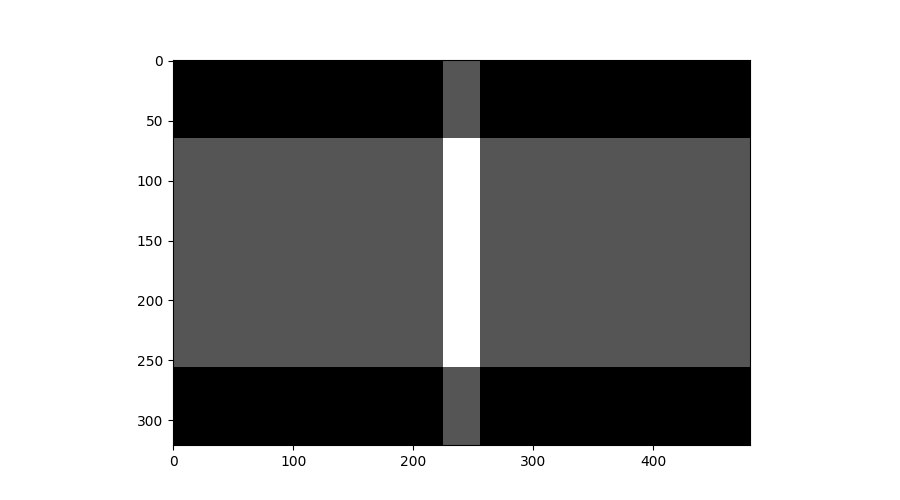

In [23]:
plt.figure()
plt.imshow(recon_matrix)

In [24]:
sub_patches_done = {k: do_thing(sub_patch) for k, sub_patch in sub_patches.items()}

In [30]:
x_recon = np.zeros_like(x)
for (i, j), sub_patch_recon in sub_patches_done.items():
    i_max = min((i+1) * 256, x.shape[0]+1)
    i_min = max(0, i_max - 257)
    j_max = min((j+1) * 256, x.shape[1]+1)
    j_min = max(0, j_max - 257)
    slice_i = slice(i_min, i_max)
    slice_j = slice(j_min, j_max)
    x_recon[slice_i, slice_j] += sub_patch_recon
x_recon /= recon_matrix

<IPython.core.display.Javascript object>


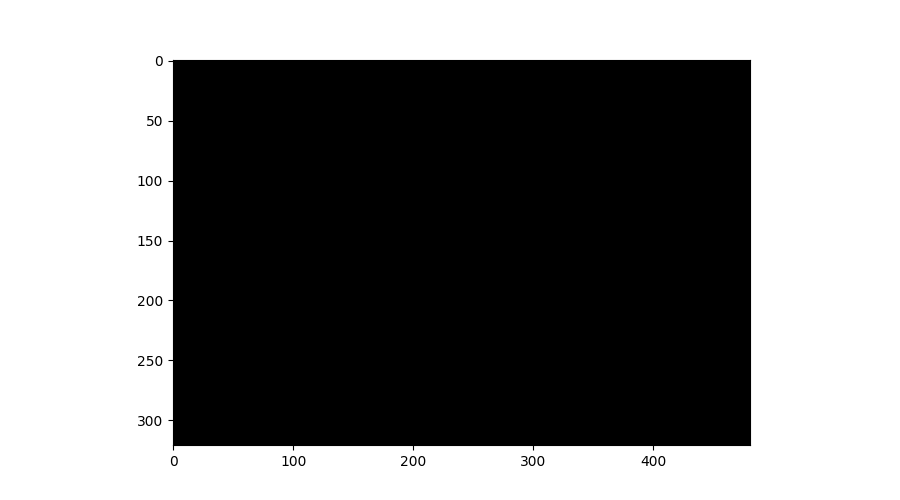

In [31]:
plt.figure()
plt.imshow((x - x_recon)**2)

In [32]:
np.linalg.norm(x - x_recon)

0.0